In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p p1a_outputs_tmp

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file p1a_outputs_tmp already exists.
Error occurred while processing: p1a_outputs_tmp.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:16,  7.30it/s]                         


Epoch 1 of 100
Generator loss: 1.24297103, Discriminator loss: 0.47616212


118it [00:15,  7.56it/s]                         


Epoch 2 of 100
Generator loss: 1.58738752, Discriminator loss: 0.69423080


118it [00:15,  7.68it/s]                         


Epoch 3 of 100
Generator loss: 3.59481818, Discriminator loss: 0.41902604


118it [00:15,  7.64it/s]                         


Epoch 4 of 100
Generator loss: 4.70461849, Discriminator loss: 0.43686556


118it [00:15,  7.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


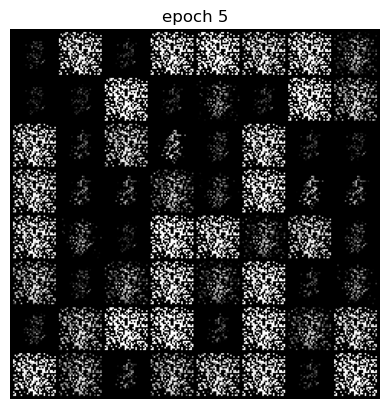

Epoch 5 of 100
Generator loss: 4.85583042, Discriminator loss: 0.29408100


118it [00:15,  7.64it/s]                         


Epoch 6 of 100
Generator loss: 3.95715024, Discriminator loss: 0.34196242


118it [00:15,  7.76it/s]                         


Epoch 7 of 100
Generator loss: 3.62323781, Discriminator loss: 0.40400098


118it [00:15,  7.61it/s]                         


Epoch 8 of 100
Generator loss: 2.08592696, Discriminator loss: 0.54665208


118it [00:15,  7.67it/s]                         


Epoch 9 of 100
Generator loss: 2.18722696, Discriminator loss: 0.35235466


118it [00:15,  7.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


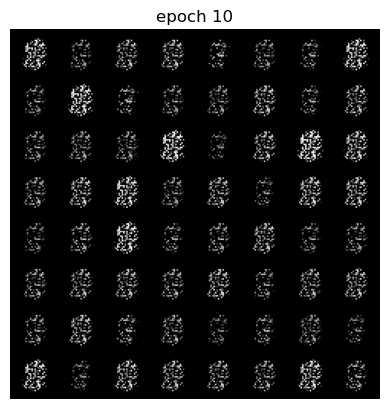

Epoch 10 of 100
Generator loss: 1.69637471, Discriminator loss: 0.60306349


118it [00:15,  7.86it/s]                         


Epoch 11 of 100
Generator loss: 2.11516292, Discriminator loss: 0.44180939


118it [00:15,  7.72it/s]                         


Epoch 12 of 100
Generator loss: 2.02542489, Discriminator loss: 0.46583789


118it [00:15,  7.47it/s]                         


Epoch 13 of 100
Generator loss: 2.89224707, Discriminator loss: 0.47619814


118it [00:15,  7.70it/s]                         


Epoch 14 of 100
Generator loss: 3.00350198, Discriminator loss: 0.42284493


118it [00:14,  7.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


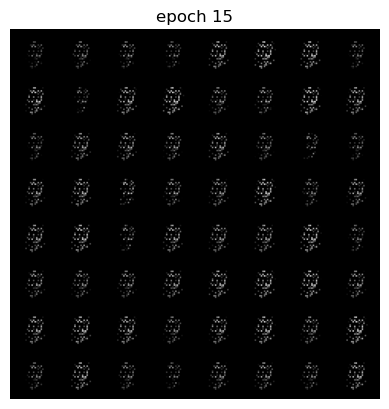

Epoch 15 of 100
Generator loss: 2.35510148, Discriminator loss: 0.37300440


118it [00:15,  7.73it/s]                         


Epoch 16 of 100
Generator loss: 3.44421747, Discriminator loss: 0.33301626


118it [00:15,  7.83it/s]                         


Epoch 17 of 100
Generator loss: 2.46232603, Discriminator loss: 0.37268195


118it [00:15,  7.59it/s]                         


Epoch 18 of 100
Generator loss: 2.63833903, Discriminator loss: 0.31613408


118it [00:15,  7.63it/s]                         


Epoch 19 of 100
Generator loss: 3.44672009, Discriminator loss: 0.30136959


118it [00:15,  7.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


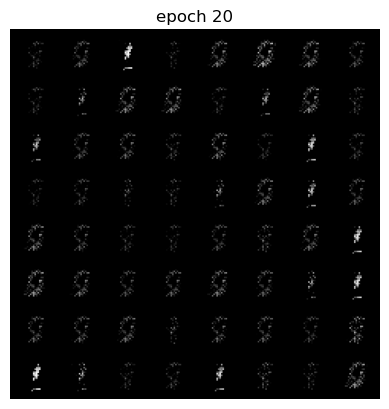

Epoch 20 of 100
Generator loss: 3.07376536, Discriminator loss: 0.23067812


118it [00:15,  7.53it/s]                         


Epoch 21 of 100
Generator loss: 3.86878576, Discriminator loss: 0.17985468


118it [00:15,  7.65it/s]                         


Epoch 22 of 100
Generator loss: 4.02765214, Discriminator loss: 0.14851328


118it [00:15,  7.67it/s]                         


Epoch 23 of 100
Generator loss: 4.21075338, Discriminator loss: 0.11531236


118it [00:15,  7.67it/s]                         


Epoch 24 of 100
Generator loss: 4.21580289, Discriminator loss: 0.18908198


118it [00:15,  7.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


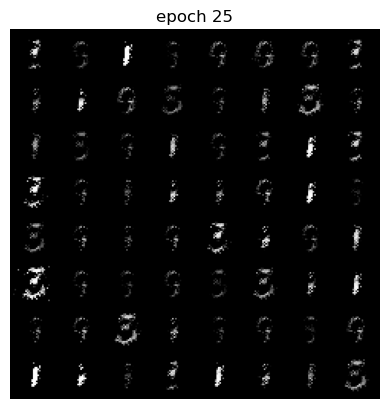

Epoch 25 of 100
Generator loss: 3.37864443, Discriminator loss: 0.24217277


118it [00:15,  7.68it/s]                         


Epoch 26 of 100
Generator loss: 2.83240986, Discriminator loss: 0.29650504


118it [00:15,  7.68it/s]                         


Epoch 27 of 100
Generator loss: 3.24599605, Discriminator loss: 0.21393063


118it [00:15,  7.44it/s]                         


Epoch 28 of 100
Generator loss: 3.83337100, Discriminator loss: 0.18332681


118it [00:15,  7.57it/s]                         


Epoch 29 of 100
Generator loss: 3.71240902, Discriminator loss: 0.14656623


118it [00:15,  7.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


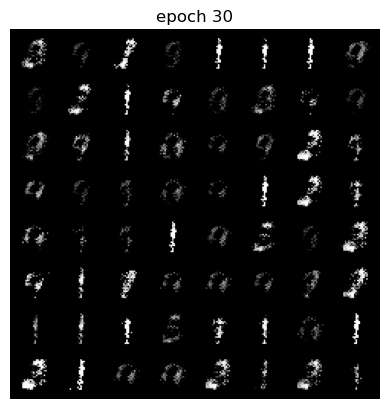

Epoch 30 of 100
Generator loss: 3.72533690, Discriminator loss: 0.18243866


118it [00:15,  7.66it/s]                         


Epoch 31 of 100
Generator loss: 3.88430200, Discriminator loss: 0.20193673


118it [00:15,  7.72it/s]                         


Epoch 32 of 100
Generator loss: 3.43143721, Discriminator loss: 0.22197386


118it [00:15,  7.65it/s]                         


Epoch 33 of 100
Generator loss: 3.45552682, Discriminator loss: 0.22146069


118it [00:15,  7.68it/s]                         


Epoch 34 of 100
Generator loss: 3.68563591, Discriminator loss: 0.17188020


118it [00:15,  7.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


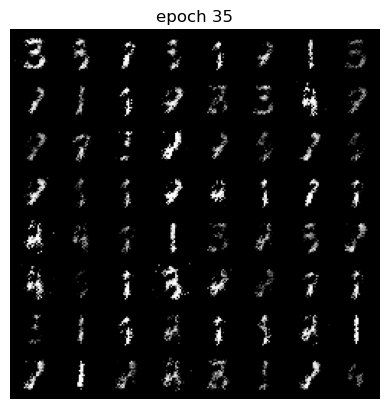

Epoch 35 of 100
Generator loss: 3.88260455, Discriminator loss: 0.19507213


118it [00:15,  7.61it/s]                         


Epoch 36 of 100
Generator loss: 3.23877099, Discriminator loss: 0.24052422


118it [00:15,  7.61it/s]                         


Epoch 37 of 100
Generator loss: 3.71052490, Discriminator loss: 0.17971979


118it [00:15,  7.59it/s]                         


Epoch 38 of 100
Generator loss: 3.67316496, Discriminator loss: 0.18717192


118it [00:15,  7.66it/s]                         


Epoch 39 of 100
Generator loss: 3.31646563, Discriminator loss: 0.24507479


118it [00:15,  7.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


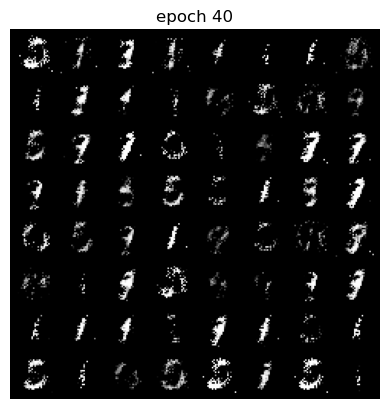

Epoch 40 of 100
Generator loss: 3.40202487, Discriminator loss: 0.19998212


118it [00:15,  7.77it/s]                         


Epoch 41 of 100
Generator loss: 3.84574660, Discriminator loss: 0.16275969


118it [00:15,  7.72it/s]                         


Epoch 42 of 100
Generator loss: 3.55722332, Discriminator loss: 0.21118333


118it [00:15,  7.72it/s]                         


Epoch 43 of 100
Generator loss: 3.23828762, Discriminator loss: 0.24149788


118it [00:15,  7.65it/s]                         


Epoch 44 of 100
Generator loss: 3.45248433, Discriminator loss: 0.19936438


118it [00:15,  7.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


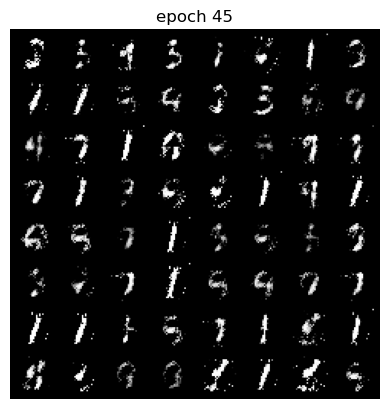

Epoch 45 of 100
Generator loss: 3.38115906, Discriminator loss: 0.20268878


118it [00:15,  7.84it/s]                         


Epoch 46 of 100
Generator loss: 3.30168425, Discriminator loss: 0.21588565


118it [00:15,  7.72it/s]                         


Epoch 47 of 100
Generator loss: 3.31726278, Discriminator loss: 0.20410488


118it [00:15,  7.65it/s]                         


Epoch 48 of 100
Generator loss: 3.40194808, Discriminator loss: 0.20371224


118it [00:15,  7.72it/s]                         


Epoch 49 of 100
Generator loss: 3.26089522, Discriminator loss: 0.20555138


118it [00:15,  7.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


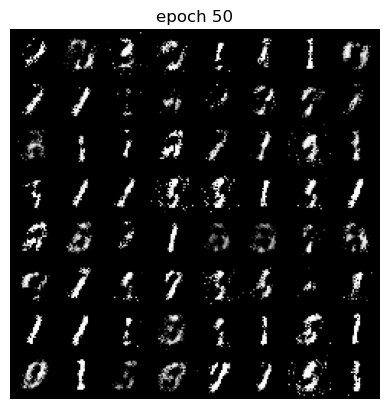

Epoch 50 of 100
Generator loss: 3.41283306, Discriminator loss: 0.20887292


118it [00:15,  7.61it/s]                         


Epoch 51 of 100
Generator loss: 3.25166130, Discriminator loss: 0.22087605


118it [00:15,  7.86it/s]                         


Epoch 52 of 100
Generator loss: 3.18287370, Discriminator loss: 0.23224436


118it [00:15,  7.57it/s]                         


Epoch 53 of 100
Generator loss: 2.94169869, Discriminator loss: 0.26789310


118it [00:15,  7.80it/s]                         


Epoch 54 of 100
Generator loss: 2.89167421, Discriminator loss: 0.23868835


118it [00:15,  7.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


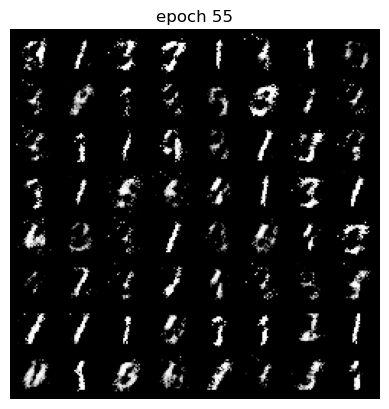

Epoch 55 of 100
Generator loss: 3.08017896, Discriminator loss: 0.25680777


118it [00:15,  7.57it/s]                         


Epoch 56 of 100
Generator loss: 3.20125938, Discriminator loss: 0.24978296


118it [00:15,  7.55it/s]                         


Epoch 57 of 100
Generator loss: 2.83758080, Discriminator loss: 0.24940532


118it [00:15,  7.72it/s]                         


Epoch 58 of 100
Generator loss: 2.91991551, Discriminator loss: 0.23918637


118it [00:15,  7.63it/s]                         


Epoch 59 of 100
Generator loss: 3.05363352, Discriminator loss: 0.23557264


118it [00:15,  7.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


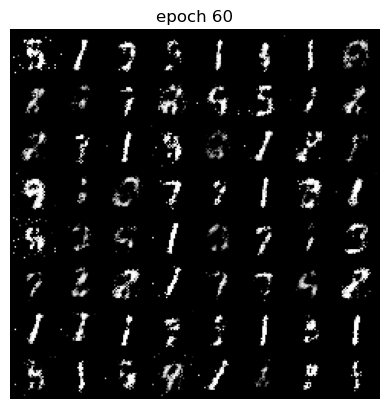

Epoch 60 of 100
Generator loss: 2.78479853, Discriminator loss: 0.27235615


118it [00:15,  7.47it/s]                         


Epoch 61 of 100
Generator loss: 2.91909182, Discriminator loss: 0.25935468


118it [00:15,  7.64it/s]                         


Epoch 62 of 100
Generator loss: 2.71260434, Discriminator loss: 0.29567412


118it [00:15,  7.69it/s]                         


Epoch 63 of 100
Generator loss: 2.53008748, Discriminator loss: 0.30090876


118it [00:15,  7.69it/s]                         


Epoch 64 of 100
Generator loss: 2.63462555, Discriminator loss: 0.28411501


118it [00:15,  7.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


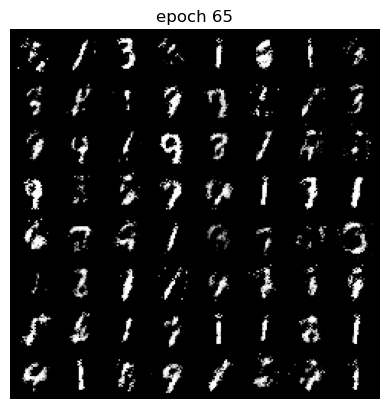

Epoch 65 of 100
Generator loss: 2.78018665, Discriminator loss: 0.27367642


118it [00:15,  7.62it/s]                         


Epoch 66 of 100
Generator loss: 2.78991385, Discriminator loss: 0.27766914


118it [00:15,  7.62it/s]                         


Epoch 67 of 100
Generator loss: 2.71304104, Discriminator loss: 0.29036144


118it [00:15,  7.81it/s]                         


Epoch 68 of 100
Generator loss: 2.47531624, Discriminator loss: 0.31670659


118it [00:15,  7.63it/s]                         


Epoch 69 of 100
Generator loss: 2.55479891, Discriminator loss: 0.29235577


118it [00:15,  7.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


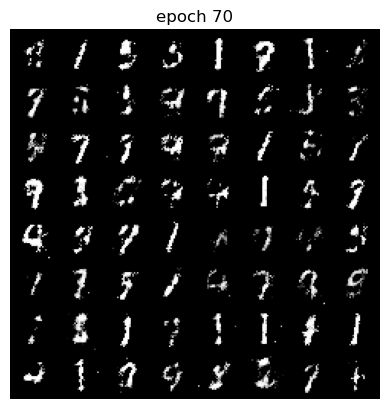

Epoch 70 of 100
Generator loss: 2.66232947, Discriminator loss: 0.29200575


118it [00:15,  7.80it/s]                         


Epoch 71 of 100
Generator loss: 2.49512759, Discriminator loss: 0.30951306


118it [00:15,  7.65it/s]                         


Epoch 72 of 100
Generator loss: 2.54315397, Discriminator loss: 0.30531607


118it [00:15,  7.77it/s]                         


Epoch 73 of 100
Generator loss: 2.43518973, Discriminator loss: 0.33512121


118it [00:15,  7.58it/s]                         


Epoch 74 of 100
Generator loss: 2.41352962, Discriminator loss: 0.33021147


118it [00:15,  7.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


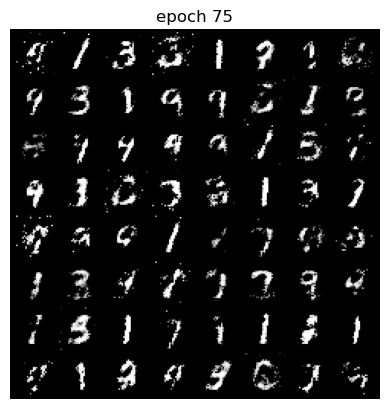

Epoch 75 of 100
Generator loss: 2.38961408, Discriminator loss: 0.33166851


118it [00:15,  7.68it/s]                         


Epoch 76 of 100
Generator loss: 2.21716911, Discriminator loss: 0.34409584


118it [00:15,  7.74it/s]                         


Epoch 77 of 100
Generator loss: 2.27229078, Discriminator loss: 0.34861966


118it [00:15,  7.74it/s]                         


Epoch 78 of 100
Generator loss: 2.30264904, Discriminator loss: 0.34470463


118it [00:15,  7.60it/s]                         


Epoch 79 of 100
Generator loss: 2.13161439, Discriminator loss: 0.36758021


118it [00:15,  7.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


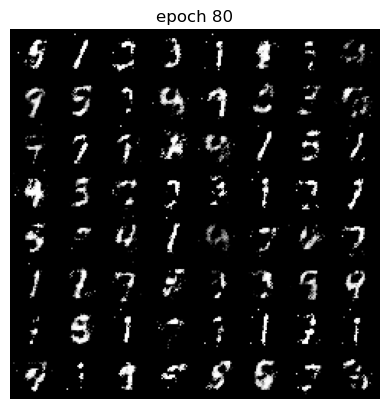

Epoch 80 of 100
Generator loss: 2.08610375, Discriminator loss: 0.35993368


118it [00:15,  7.68it/s]                         


Epoch 81 of 100
Generator loss: 2.36204096, Discriminator loss: 0.32826508


118it [00:15,  7.55it/s]                         


Epoch 82 of 100
Generator loss: 2.08872411, Discriminator loss: 0.38273459


118it [00:15,  7.74it/s]                         


Epoch 83 of 100
Generator loss: 2.13898548, Discriminator loss: 0.35344777


118it [00:15,  7.58it/s]                         


Epoch 84 of 100
Generator loss: 2.17720170, Discriminator loss: 0.36595572


118it [00:15,  7.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


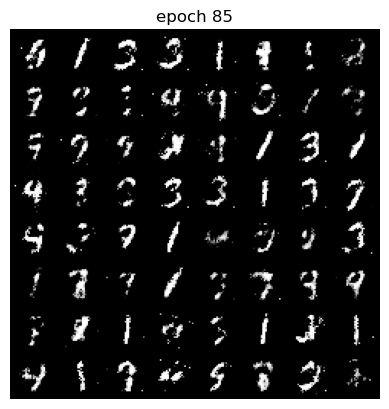

Epoch 85 of 100
Generator loss: 2.20737815, Discriminator loss: 0.36168004


118it [00:15,  7.48it/s]                         


Epoch 86 of 100
Generator loss: 2.12783935, Discriminator loss: 0.36442902


118it [00:15,  7.72it/s]                         


Epoch 87 of 100
Generator loss: 2.18681686, Discriminator loss: 0.36567683


118it [00:15,  7.76it/s]                         


Epoch 88 of 100
Generator loss: 2.20888687, Discriminator loss: 0.34478923


118it [00:15,  7.70it/s]                         


Epoch 89 of 100
Generator loss: 2.09296817, Discriminator loss: 0.37097506


118it [00:15,  7.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


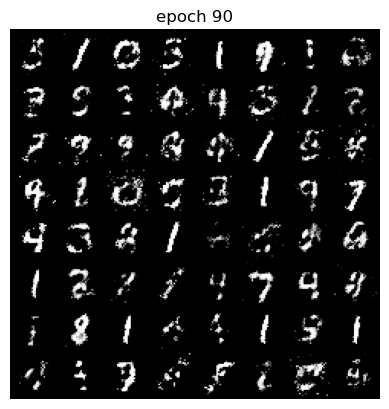

Epoch 90 of 100
Generator loss: 1.98341008, Discriminator loss: 0.38689943


118it [00:15,  7.67it/s]                         


Epoch 91 of 100
Generator loss: 2.05014788, Discriminator loss: 0.37186766


118it [00:15,  7.71it/s]                         


Epoch 92 of 100
Generator loss: 2.07723813, Discriminator loss: 0.38959687


118it [00:15,  7.58it/s]                         


Epoch 93 of 100
Generator loss: 1.91994164, Discriminator loss: 0.39159962


118it [00:15,  7.72it/s]                         


Epoch 94 of 100
Generator loss: 2.04141504, Discriminator loss: 0.38082867


118it [00:15,  7.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


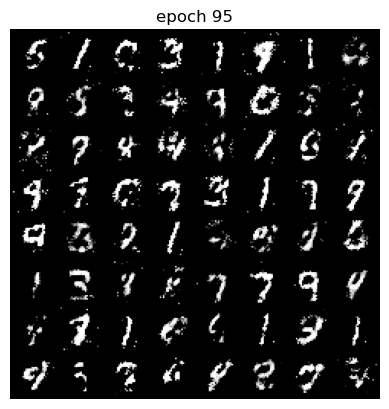

Epoch 95 of 100
Generator loss: 2.02737151, Discriminator loss: 0.38906941


118it [00:15,  7.70it/s]                         


Epoch 96 of 100
Generator loss: 1.96826085, Discriminator loss: 0.41051726


118it [00:15,  7.68it/s]                         


Epoch 97 of 100
Generator loss: 2.03733952, Discriminator loss: 0.37864967


118it [00:15,  7.59it/s]                         


Epoch 98 of 100
Generator loss: 1.96877479, Discriminator loss: 0.39010819


118it [00:14,  7.89it/s]                         


Epoch 99 of 100
Generator loss: 2.01215933, Discriminator loss: 0.39180225


118it [00:14,  8.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


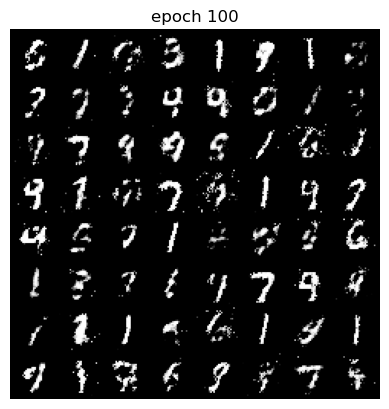

Epoch 100 of 100
Generator loss: 1.99463627, Discriminator loss: 0.39684697


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    optim_g.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    return loss.item()
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    #print(output.shape)
    optim_d.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    return loss.item()
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        
        # ###  Training discriminator ####
        # 1. Generate fake data
        real_batch_size = data[0].shape[0]
        noisy_input = create_noise(real_batch_size, nz)
        fake_samples = generator(noisy_input).to(device)
        fake_labels = label_fake(real_batch_size)

        real_samples = data[0].to(device)
        real_labels = label_real(real_batch_size)

        combined_samples = torch.cat((real_samples,fake_samples),0)
        combined_labels = torch.cat((real_labels,fake_labels),0).view(real_batch_size*2, 1)

        dis_output = discriminator(combined_samples)
        loss_d += discriminator_loss(dis_output, combined_labels)
        optim_d.step()

        # Training generator
        # 1. Generate fake data
        noisy_input2 = create_noise(real_batch_size, nz)
        fake_samples2 = generator(noisy_input2).to(device)
        fake_labels2 = (label_real(real_batch_size)).view(real_batch_size, 1) #We want them to be true
        # 2. Frward and backward
        dis_output2 = discriminator(fake_samples2)
        loss_g += generator_loss(dis_output2, fake_labels2)
        optim_g.step()

    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"p1a_outputs_tmp/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'p1a_outputs_tmp/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('p1a_outputs_tmp/generator_images.gif', imgs)

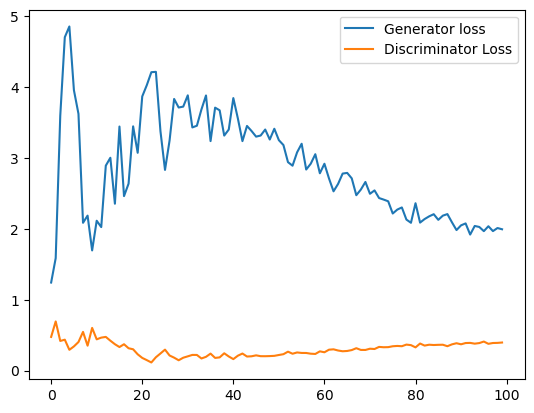

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('p1a_outputs_tmp/loss.png')

In [18]:
import winsound
frequency = 2000  # Set Frequency To 2500 Hertz
duration = 200  # Set Duration To 1000 ms == 1 second
for i in range(0,7):
    winsound.Beep(frequency-i*50, duration+i*50)
losses_g

[1.2429710326031742,
 1.587387524290472,
 3.5948181829900823,
 4.704618490659273,
 4.8558304248712005,
 3.9571502381919794,
 3.6232378136398444,
 2.085926955072289,
 2.1872269567261395,
 1.6963747123367765,
 2.1151629227858324,
 2.025424887481918,
 2.8922470706140895,
 3.003501980732649,
 2.355101482481019,
 3.4442174719949055,
 2.4623260284081483,
 2.638339032474746,
 3.446720092724531,
 3.0737653552976427,
 3.868785758303781,
 4.027652135262122,
 4.210753375648434,
 4.215802889603835,
 3.378644429720365,
 2.832409859722496,
 3.2459960513644748,
 3.8333710034688315,
 3.7124090215079804,
 3.725336900124183,
 3.8843019966386323,
 3.4314372091211824,
 3.455526818577041,
 3.685635909056052,
 3.8826045480548825,
 3.238770989271311,
 3.7105248952523255,
 3.6731649627033462,
 3.3164656304905558,
 3.4020248722826314,
 3.8457466007297874,
 3.5572233159317928,
 3.2382876241309013,
 3.4524843325981727,
 3.3811590569651027,
 3.301684251198402,
 3.3172627779153676,
 3.401948077046973,
 3.260895217